In [101]:
import copy
import scipy as sp
from functions.tools import decode_shape_binaries_str, encode_shape_binaries

def neighbors(polyomino):
    """
    ARGS: polyomino: a list of tuples representing the squares of a polyomino
    RETURN: a list of tuples representing the squares that are valid neighbors of the polyomino
    """
    found = []
    for (x,y) in polyomino:
        for delta_x, delta_y in [(1,0), (-1,0), (0,1), (0,-1)]:
            if y + delta_y < 0 or (y + delta_y == 0 and x + delta_x < 0):
                continue
            new_square = (x + delta_x, y + delta_y)
            if new_square not in found:
                found.append(new_square)
    return found

def redelmeier(n):
    """
    ARGS: n: the size of the polyominoes to count
    Caller function to redelmeier_recursion. Initializes the counts list and calls the recursive function.
    """
    counts = [0] * (n+1)
    counts[0] = 1
    polyomino = []
    untried_set = [(0,0)]
    redelmeier_recursion(n, counts, polyomino, untried_set)
    return counts

def redelmeier_recursion(n, counts, polyomino, untried_set):
    while len(untried_set) > 0:
        new_square = untried_set.pop()
        new_untried_set = copy.copy(untried_set)
        new_square_neighbors = neighbors([new_square])
        polyomino_neighbors = neighbors(polyomino)
        for s in new_square_neighbors:
            if s not in polyomino_neighbors and s not in polyomino:
                new_untried_set.append(s)
        new_polyomino = copy.copy(polyomino)
        new_polyomino.append(new_square)
        counts[len(new_polyomino)] += 1
        if len(new_polyomino) < n:
            redelmeier_recursion(n, counts, new_polyomino, new_untried_set)

print(redelmeier(10))


 

[1, 1, 2, 6, 19, 63, 216, 760, 2725, 9910, 36446]


# Modified Redelmeier Implementation

In [102]:
import copy
def neighbors(polyomino):
    """
    ARGS: polyomino: a list of tuples representing the squares of a polyomino
    RETURN: a list of tuples representing the squares that are valid neighbors of the polyomino
    """
    found = []
    for (x,y) in polyomino:
        for delta_x, delta_y in [(1,0), (-1,0), (0,1), (0,-1)]:
            if y + delta_y < 0 or (y + delta_y == 0 and x + delta_x < 0):
                continue
            new_square = (x + delta_x, y + delta_y)
            if new_square not in found:
                found.append(new_square)
    return found

def redelmeier(n):
    """
    ARGS: n: the size of the polyominoes to count
    Caller function to redelmeier_recursion. Initializes the counts list and calls the recursive function.
    """
    polyomino = []
    n_ominoes = []
    untried_set = [(0,0)]
    redelmeier_recursion(n, n_ominoes, polyomino, untried_set)
    return n_ominoes

def redelmeier_recursion(n, n_ominoes, polyomino, untried_set):
    while len(untried_set) > 0:
        new_square = untried_set.pop()
        new_untried_set = copy.copy(untried_set)
        new_square_neighbors = neighbors([new_square])
        polyomino_neighbors = neighbors(polyomino)
        for s in new_square_neighbors:
            if s not in polyomino_neighbors and s not in polyomino:
                new_untried_set.append(s)
        new_polyomino = copy.copy(polyomino)
        new_polyomino.append(new_square)
        if len(new_polyomino) < n:
            redelmeier_recursion(n, n_ominoes, new_polyomino, new_untried_set)
        else:
            n_ominoes.append(new_polyomino)


decominoes = redelmeier(10)
print(len(decominoes))


36446


In [103]:

# Converts tuple representation of polyomino to grid representation
def tuple_polyomino_to_grid(tuple_polyomino):
    min_x = min([x for (x,y) in tuple_polyomino])
    min_y = min([y for (x,y) in tuple_polyomino])
    tuple_polyomino = [(x - min_x, y - min_y) for (x,y) in tuple_polyomino]
    grid = [['0' for i in range(10)] for j in range(10)]
    for (x,y) in tuple_polyomino:
        grid[y][x] = '1'
    return grid


# Converts grid representation to string representation
def grid_to_string(grid):
    string = ""
    for row in grid:
        string += " ".join(row).replace('1','\u25a0').replace('0','_') + "\n"
    return string







 

In [104]:
# print(tuple_polyomino_to_grid(decominoes[0]))
index = 20
print(grid_to_string(tuple_polyomino_to_grid(decominoes[index])))
print(decominoes[index])


_ ■ _ _ _ _ _ _ _ _
_ ■ _ _ _ _ _ _ _ _
_ ■ _ _ _ _ _ _ _ _
_ ■ _ _ _ _ _ _ _ _
_ ■ _ _ _ _ _ _ _ _
_ ■ _ _ _ _ _ _ _ _
_ ■ _ _ _ _ _ _ _ _
■ ■ ■ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (-1, 7), (1, 7)]


# Enumerate free decominoes!

In [105]:
# For each decomino in decominoes, transform it into a set of its rotations and reflections
# If not in unique_decominoes, add it to unique_decominoes



def get_rotations(decomino):
    rotate = lambda decomino: [(y,-x) for (x,y) in decomino]
    rotations = []
    for _ in range(4):      
        decomino = rotate(decomino)
        rotations.append(decomino)
    return rotations


def get_reflections(decomino):
    return [[(-x,y) for (x,y) in decomino], [(x,-y) for (x,y) in decomino]]

# Takes in the fixed decominoes and returns the smaller set of free decominoes
def get_unique_decominoes(decominoes):
    unique_decominoes = set()
    for decomino in decominoes:
        transformations = [] # A list of tuple representations of the decomino's rotations and reflections
        for rotation in get_rotations(decomino):
            transformations.append(rotation)
            for reflection in get_reflections(rotation):
                transformations.append(reflection)
        transformations_grids = map(tuple_polyomino_to_grid, transformations)
        transformation_encodings_set = set(map(encode_shape_binaries, transformations_grids))
        if not transformation_encodings_set.intersection(unique_decominoes): # Transform every possible way and check if any of them are already in the set
            unique_decominoes.add(encode_shape_binaries(tuple_polyomino_to_grid(decomino)))
    return unique_decominoes
   
# The list of free decominoes    
free_decominoes = get_unique_decominoes(decominoes)



In [118]:

free_decominoes_list = list(free_decominoes)
print(free_decominoes_list)
# Now each decomino is an item in the list, but I want each decomino represented as a list of its integers

free_decominoes_list_converted = [list(map(int, decomino.split())) for decomino in free_decominoes_list]
print(free_decominoes_list_converted)


['32 800 480 32 32 0 0 0 0 0', '896 640 640 768 256 0 0 0 0 0', '320 960 256 256 768 0 0 0 0 0', '224 176 384 768 0 0 0 0 0 0', '32 32 32 96 192 896 0 0 0 0', '384 384 256 768 448 0 0 0 0 0', '256 256 448 896 768 0 0 0 0 0', '128 192 128 896 640 512 0 0 0 0', '320 960 256 896 0 0 0 0 0 0', '384 256 256 384 256 768 512 0 0 0', '64 64 64 192 384 256 768 0 0 0', '64 96 64 64 64 960 0 0 0 0', '128 128 128 128 640 896 256 0 0 0', '224 128 640 896 512 0 0 0 0 0', '256 768 512 512 768 384 128 0 0 0', '64 64 624 960 0 0 0 0 0 0', '64 64 704 896 384 0 0 0 0 0', '768 512 512 768 256 384 128 0 0 0', '256 384 256 256 896 768 0 0 0 0', '64 64 64 960 64 64 64 0 0 0', '896 768 512 896 256 0 0 0 0 0', '64 192 128 192 384 768 0 0 0 0', '256 256 256 256 384 256 256 768 0 0', '128 192 128 128 384 768 256 0 0 0', '64 576 832 448 256 0 0 0 0 0', '384 896 384 896 0 0 0 0 0 0', '192 704 896 192 0 0 0 0 0 0', '384 256 256 256 256 960 0 0 0 0', '224 128 128 192 896 0 0 0 0 0', '384 256 256 256 384 896 0 0 0 0'

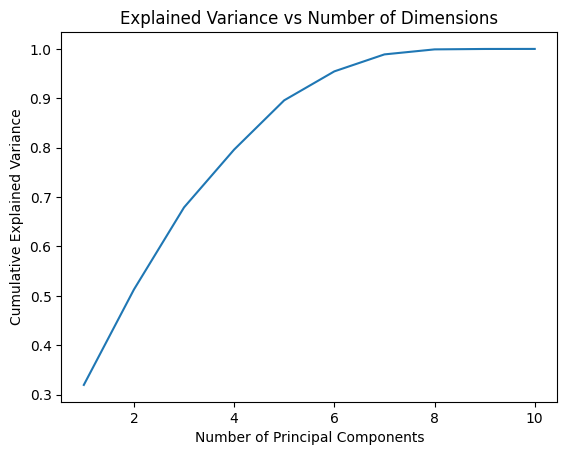

In [129]:
from scipy.spatial.distance import pdist, squareform
import sklearn as skl
from sklearn.metrics import pairwise_distances
import numpy as np

# Determine the number of optimal number of dimensions for the space

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert list of lists into a 2D numpy array
data = np.array(free_decominoes_list_converted)

# Perform PCA to reduce the data
pca = PCA()
pca.fit(data)

# Plot the explained variance ratio to help determine the optimal number of dimensions
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Dimensions')
plt.show()


In [127]:


# Function to compute pairwise distances in the reduced 7D space
def compute_pairwise_distances_7D(lst, n_components=7):
    # Convert list of lists into a 2D numpy array
    data = np.array(free_decominoes_list_converted)
    
    # Perform PCA to reduce to n_components (7D in your case)
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(data)
    
    # Compute pairwise Euclidean distances in the reduced space using pdist
    pairwise_distances = pdist(reduced_data, metric='euclidean')
    
    # Convert the pairwise distances into a square matrix
    distance_matrix = squareform(pairwise_distances)
    
    return distance_matrix

# Compute pairwise distances in the 7D space
distance_matrix_7D = compute_pairwise_distances_7D(free_decominoes_list_converted, n_components=7)

# Print the resulting pairwise distance matrix
print(distance_matrix_7D)
print(len(distance_matrix_7D))

[[   0.         1178.75182552  866.35554751 ... 1257.39808116
  1367.08218755 1018.33979572]
 [1178.75182552    0.         1051.52030194 ... 1239.69914291
  1395.32377616  913.68133342]
 [ 866.35554751 1051.52030194    0.         ... 1171.82755743
  1268.56612606 1276.73226964]
 ...
 [1257.39808116 1239.69914291 1171.82755743 ...    0.
  1366.96634723 1092.12755013]
 [1367.08218755 1395.32377616 1268.56612606 ... 1366.96634723
     0.         1440.25091721]
 [1018.33979572  913.68133342 1276.73226964 ... 1092.12755013
  1440.25091721    0.        ]]
4655


In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)




/Users/sarawu/Library/Caches/pypoetry/virtualenvs/benchmarking-creativity-nbm55LEq-py3.12/lib/python3.12/site-packages/sklearn/manifold/_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


KeyboardInterrupt: 